In [1]:
import numpy as np
import skimage.io
import skimage.feature
from skimage.color import rgb2gray
from skimage.io import imread, imsave, imshow
import math
import statistics
import glob
from PIL import Image
import pandas as pd
import csv

In [2]:
def class_definition(imgpath):
    if "paper" in imgpath:
        return 'paper'
    elif "rock" in imgpath:
        return 'rock'
    elif "scissors" in imgpath:
        return 'scissors'

In [3]:
def extract_feature(img):
    img_string = Image.open(img)
    img_filename = img_string.filename
    img_class = class_definition(img_filename)
#     print(img_filename)
#     print(img_class)
    
    im = skimage.io.imread(img, as_gray=True)    
    im = skimage.img_as_ubyte(im)
    im = np.true_divide(im, 32)
    im = im.astype(np.uint8)
    g = skimage.feature.greycomatrix(im, [1,2], [0,45,90,135], levels=8, symmetric=False, normed=True)
#     contrast
    contrast_1 = skimage.feature.greycoprops(g, 'contrast')[0][0]
    contrast_2 = skimage.feature.greycoprops(g, 'contrast')[0][1]
    contrast_3 = skimage.feature.greycoprops(g, 'contrast')[0][2]
    contrast_4 = skimage.feature.greycoprops(g, 'contrast')[0][3]
    contrast_11 = skimage.feature.greycoprops(g, 'contrast')[1][0]
    contrast_22 = skimage.feature.greycoprops(g, 'contrast')[1][1]
    contrast_33 = skimage.feature.greycoprops(g, 'contrast')[1][2]
    contrast_44 = skimage.feature.greycoprops(g, 'contrast')[1][3]
    
    
#     correlation
    correlation_1 = skimage.feature.greycoprops(g, 'correlation')[0][0]
    correlation_2 = skimage.feature.greycoprops(g, 'correlation')[0][1]
    correlation_3 = skimage.feature.greycoprops(g, 'correlation')[0][2]
    correlation_4 = skimage.feature.greycoprops(g, 'correlation')[0][3]
    correlation_11 = skimage.feature.greycoprops(g, 'correlation')[1][0]
    correlation_22 = skimage.feature.greycoprops(g, 'correlation')[1][1]
    correlation_33 = skimage.feature.greycoprops(g, 'correlation')[1][2]
    correlation_44 = skimage.feature.greycoprops(g, 'correlation')[1][3]
    
#     energy
    energy_1 = skimage.feature.greycoprops(g, 'energy')[0][0]
    energy_2 = skimage.feature.greycoprops(g, 'energy')[0][1]
    energy_3 = skimage.feature.greycoprops(g, 'energy')[0][2]
    energy_4 = skimage.feature.greycoprops(g, 'energy')[0][3]
    energy_11 = skimage.feature.greycoprops(g, 'energy')[1][0]
    energy_22 = skimage.feature.greycoprops(g, 'energy')[1][1]
    energy_33 = skimage.feature.greycoprops(g, 'energy')[1][2]
    energy_44 = skimage.feature.greycoprops(g, 'energy')[1][3]
    
#     homogenity
    homogenity_1 = skimage.feature.greycoprops(g, 'homogeneity')[0][0]
    homogenity_2 = skimage.feature.greycoprops(g, 'homogeneity')[0][1]
    homogenity_3 = skimage.feature.greycoprops(g, 'homogeneity')[0][2]
    homogenity_4 = skimage.feature.greycoprops(g, 'homogeneity')[0][3]
    homogenity_11 = skimage.feature.greycoprops(g, 'homogeneity')[1][0]
    homogenity_22 = skimage.feature.greycoprops(g, 'homogeneity')[1][1]
    homogenity_33 = skimage.feature.greycoprops(g, 'homogeneity')[1][2]
    homogenity_44 = skimage.feature.greycoprops(g, 'homogeneity')[1][3]
    
    feature = np.array([
        img_filename,
        img_class,
        contrast_1,contrast_2,contrast_3,contrast_4,contrast_11,contrast_22,contrast_33,contrast_44,
        correlation_1,correlation_2,correlation_3,correlation_4,correlation_11,correlation_22,correlation_33,correlation_44,
        energy_1,energy_2,energy_3,energy_4,energy_11,energy_22,energy_33,energy_44,
        homogenity_1,homogenity_2,homogenity_3,homogenity_4,homogenity_11,homogenity_22,homogenity_33,homogenity_44
    ])
    
    return feature
    

In [4]:
def training(datasets):
    feature_datasets =[]
    for data in datasets:
        data_feature = extract_feature(data)
        feature_datasets.append(data_feature)
    print(feature_datasets)
    # opening the csv file in 'w+' mode 
    file = open('training.csv', 'w+', newline ='') 
    # writing the data into the file 
    with file:     
        write = csv.writer(file) 
        write.writerows(feature_datasets) 

In [5]:
datasets = glob.glob('rps-cv-images/train/*/*.png')
classifier = training(datasets)

[array(['rps-cv-images/train\\paper\\04l5I8TqdzF9WDMJ.png', 'paper',
       '0.06518394648829433', '0.14522445000924356', '0.1257621440536013',
       '0.06518394648829433', '0.10493288590604023',
       '0.26279517583865414', '0.25169757778453433',
       '0.10493288590604026', '0.9394912180086578', '0.8656501296099748',
       '0.8836984327319363', '0.9394912180086579', '0.9025842485621868',
       '0.7577825054197833', '0.7680275838787909', '0.902584248562187',
       '0.6432942972106888', '0.6152861797243894', '0.622008227883859',
       '0.6432942972106888', '0.6278226303054415', '0.5873220747038382',
       '0.5875911164502382', '0.6278226303054415', '0.9675284280936457',
       '0.9332767516512327', '0.941219430485762', '0.9675284280936457',
       '0.9491040268456373', '0.8977321910825747', '0.8990363004429501',
       '0.9491040268456375'], dtype='<U46'), array(['rps-cv-images/train\\paper\\14K62H4KG1hg5qiJ.png', 'paper',
       '0.07622073578595318', '0.13979596981563333',
  

In [6]:
def euclidian_distance(img, data_training):
    datas_distance = []
    predict_image = extract_feature(img)
    with open(data_training) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            img_filename = row[0]
            img_class = row[1]
            contrast_1 = (float(row[2]) - float(predict_image[2])) ** 2
            contrast_2 = (float(row[3]) - float(predict_image[3])) ** 2
            contrast_3 = (float(row[4]) - float(predict_image[4])) ** 2
            contrast_4 = (float(row[5]) - float(predict_image[5])) ** 2
            contrast_11 = (float(row[6]) - float(predict_image[6])) ** 2
            contrast_22 = (float(row[7]) - float(predict_image[7])) ** 2
            contrast_33 = (float(row[8]) - float(predict_image[8])) ** 2
            contrast_44 = (float(row[9]) - float(predict_image[9])) ** 2
            
            correlation_1 = (float(row[10]) - float(predict_image[10])) ** 2
            correlation_2 = (float(row[11]) - float(predict_image[11])) ** 2
            correlation_3 = (float(row[12]) - float(predict_image[12])) ** 2
            correlation_4 = (float(row[13]) - float(predict_image[13])) ** 2
            correlation_11 = (float(row[14]) - float(predict_image[14])) ** 2
            correlation_22 = (float(row[15]) - float(predict_image[15])) ** 2
            correlation_33 = (float(row[16]) - float(predict_image[16])) ** 2
            correlation_44 = (float(row[17]) - float(predict_image[17])) ** 2
            
            energy_1 = (float(row[18]) - float(predict_image[18])) ** 2
            energy_2 = (float(row[19]) - float(predict_image[19])) ** 2
            energy_3 = (float(row[20]) - float(predict_image[20])) ** 2
            energy_4 = (float(row[21]) - float(predict_image[21])) ** 2
            energy_11 = (float(row[22]) - float(predict_image[22])) ** 2
            energy_22 = (float(row[23]) - float(predict_image[23])) ** 2
            energy_33 = (float(row[24]) - float(predict_image[24])) ** 2
            energy_44 = (float(row[25]) - float(predict_image[25])) ** 2
            
            homogenity_1 = (float(row[26]) - float(predict_image[26])) ** 2
            homogenity_2 = (float(row[27]) - float(predict_image[27])) ** 2
            homogenity_3 = (float(row[28]) - float(predict_image[28])) ** 2
            homogenity_4 = (float(row[29]) - float(predict_image[29])) ** 2
            homogenity_11 = (float(row[30]) - float(predict_image[30])) ** 2
            homogenity_22 = (float(row[31]) - float(predict_image[31])) ** 2
            homogenity_33 = (float(row[32]) - float(predict_image[32])) ** 2
            homogenity_44 = (float(row[33]) - float(predict_image[33])) ** 2
            
            distance = contrast_1 + contrast_2 + contrast_3 + contrast_4 + correlation_1 + correlation_2 + correlation_3 + correlation_4 + energy_1 + energy_2 + energy_3 + energy_4 + homogenity_1 + homogenity_2 + homogenity_3 + homogenity_4 + contrast_11 + contrast_22 + contrast_33 + contrast_44 + correlation_11 + correlation_22 + correlation_33 + correlation_44 + energy_11 + energy_22 + energy_33 + energy_44 + homogenity_11 + homogenity_22 + homogenity_33 + homogenity_44
            distance = math.sqrt(distance)
            
            a_data_distance = np.array([
                img_filename,
                img_class,
                distance
            ])
            
            datas_distance.append(a_data_distance)
            
    # opening the csv file in 'w+' mode 
    file = open('knn-test.csv', 'w+', newline ='') 
    # writing the data into the file 
    with file:     
        write = csv.writer(file) 
        write.writerows(datas_distance) 

In [13]:
def classification(k,euclidian_distance):
    min_array = []
    with open(euclidian_distance) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        sortedlist = sorted(readCSV, key=lambda row: row[2])
    
    data_count = 0
    while (data_count < k):
        min_array.append(sortedlist[data_count])
        data_count = data_count + 1
        
    paper = 0
    rock = 0
    scissors = 0
    for data in min_array:
        if data[1] == 'paper':
            paper = paper + 1
        elif data[1] == 'rock':
            rock = rock + 1
        elif data[1] == 'scissors':
            scissors = scissors + 1
            
    print(paper,rock,scissors)
    print(*min_array, sep="\n")
    
    if (max(paper,rock,scissors) == paper):
        return 'Hand: Paper'
    elif (max(paper,rock,scissors) == rock):
        return 'Hand: Rock'
    elif (max(paper,rock,scissors) == scissors):
        return 'Hand: Scissors'

0 5 0
['rps-cv-images/train\\rock\\9txR3KPmEGdjo4A6.png', 'rock', '0.02505750563466821']
['rps-cv-images/train\\rock\\QM8un28uGzplAkrb.png', 'rock', '0.0265704740588972']
['rps-cv-images/train\\rock\\eGm3dLnWBxRrjlJX.png', 'rock', '0.027536369903304898']
['rps-cv-images/train\\rock\\v9fNaoRtExGYVHgL.png', 'rock', '0.02766673624091125']
['rps-cv-images/train\\rock\\4yPN1zUFqW6ROTgq.png', 'rock', '0.02996528287495926']
rps-cv-images/validation/rock/00nKV8oHuTGi20gq.png  ->  Hand: Rock


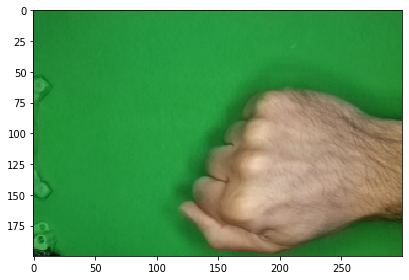

In [21]:
# Test Single
data_training = 'training.csv'
test_image = 'rps-cv-images/validation/rock/00nKV8oHuTGi20gq.png'
ed_result = euclidian_distance(test_image, data_training)
data_ed = 'knn-test.csv'
k = 5
class_result = classification(k, data_ed)
imshow(test_image)
print(test_image,' -> ',class_result)

In [25]:
# Multiple Test
data_test = glob.glob('rps-cv-images/validation/*/*.png')
data_training = 'training.csv'
data_ed = 'knn-test.csv'
k = 7
test_summary = []

for data in data_test:
    # Test Single    
    test_image = data
    ed_result = euclidian_distance(test_image, data_training)    
    class_result = classification(k, data_ed)
    test = np.array([
        test_image,
        class_result
    ])
    test_summary.append(test)

# opening the csv file in 'w+' mode 
file = open('multi_test_summary.csv', 'w+', newline ='') 
# writing the data into the file 
with file:     
    write = csv.writer(file) 
    write.writerows(test_summary)

7 0 0
['rps-cv-images/train\\paper\\Gv71lr2m5b9rBwPy.png', 'paper', '0.025517887285305286']
['rps-cv-images/train\\paper\\SjE9MULuPPnbplHT.png', 'paper', '0.027879459898250428']
['rps-cv-images/train\\paper\\ntumvg6vWpT6qIal.png', 'paper', '0.03678214316537064']
['rps-cv-images/train\\paper\\qtfGt3JjA0Orrg9v.png', 'paper', '0.04046330480320143']
['rps-cv-images/train\\paper\\hu3OxByp0O4KCJft.png', 'paper', '0.046561222642841925']
['rps-cv-images/train\\paper\\D3mbFhVy7zFkZEtV.png', 'paper', '0.048233903462666684']
['rps-cv-images/train\\paper\\Httje79JB2p6ePf0.png', 'paper', '0.050946267188587614']
0 0 7
['rps-cv-images/train\\scissors\\Ty7ti2YUZ4XJcaOk.png', 'scissors', '0.025202189132965142']
['rps-cv-images/train\\scissors\\UlvWQ1fnwQeGYNTa.png', 'scissors', '0.03141499245510854']
['rps-cv-images/train\\scissors\\H9H5HhYMY6vhEUJ4.png', 'scissors', '0.03444217164044984']
['rps-cv-images/train\\scissors\\KngvagTrRurJUlI5.png', 'scissors', '0.03712885735955319']
['rps-cv-images/train\\

7 0 0
['rps-cv-images/train\\paper\\aKUFn8PEF7LP8BaX.png', 'paper', '0.012427755712197008']
['rps-cv-images/train\\paper\\QVFB67Eza3BCNeRY.png', 'paper', '0.01984733121580625']
['rps-cv-images/train\\paper\\aOiWbMZF8BhxwLTs.png', 'paper', '0.01992440769890954']
['rps-cv-images/train\\paper\\x8fNY0V8O2CJ9vaY.png', 'paper', '0.026249261437441877']
['rps-cv-images/train\\paper\\WejRez1oUWm5lhuw.png', 'paper', '0.03197704040255682']
['rps-cv-images/train\\paper\\50Wjlq1jW7o3wcl8.png', 'paper', '0.03308627156804181']
['rps-cv-images/train\\paper\\HU7Q4utMI0vHMxlh.png', 'paper', '0.033608566596072656']
4 0 3
['rps-cv-images/train\\paper\\hH7jcOkAiHqNDWcy.png', 'paper', '0.024840281465398153']
['rps-cv-images/train\\paper\\XOWPFbuwpaJaEv9o.png', 'paper', '0.025232492999961626']
['rps-cv-images/train\\paper\\HIo7Eax3OPP5MuXl.png', 'paper', '0.02885015983034237']
['rps-cv-images/train\\scissors\\r2sdyTijtdmySs6h.png', 'scissors', '0.029161335989322693']
['rps-cv-images/train\\paper\\x3z3E6Z2qsm

4 0 3
['rps-cv-images/train\\scissors\\5mipmm4t8RM5o0tW.png', 'scissors', '0.031248695416361594']
['rps-cv-images/train\\paper\\tsfjaR5pzLN4vfRW.png', 'paper', '0.04431576313235579']
['rps-cv-images/train\\scissors\\KYTLHLPHUqj58UVh.png', 'scissors', '0.04442754563692225']
['rps-cv-images/train\\paper\\tlZ31lJJt1OhSr0a.png', 'paper', '0.04452075220246459']
['rps-cv-images/train\\paper\\Mv6oOH192gse3oZA.png', 'paper', '0.04828504699213046']
['rps-cv-images/train\\paper\\ldG6HLXeY0KilKyr.png', 'paper', '0.049275038163618855']
['rps-cv-images/train\\scissors\\G3WzvjZXkizn9iK9.png', 'scissors', '0.05266498173666019']
7 0 0
['rps-cv-images/train\\paper\\V7gDBwuUctk8myTw.png', 'paper', '0.013580626243563829']
['rps-cv-images/train\\paper\\wdUfwC8IoQbVtqzR.png', 'paper', '0.02427332999523437']
['rps-cv-images/train\\paper\\qVqPFRhMJXPFh8Yb.png', 'paper', '0.025996711425215407']
['rps-cv-images/train\\paper\\Je4YZuaXlY4KaAfQ.png', 'paper', '0.02805104546515771']
['rps-cv-images/train\\paper\\J

0 6 1
['rps-cv-images/train\\rock\\lN7rUXL8DBzW1KoR.png', 'rock', '0.03567304811596855']
['rps-cv-images/train\\scissors\\zdo3LHesq3aHmu1f.png', 'scissors', '0.03647893809288639']
['rps-cv-images/train\\rock\\rU6kbTLXKpV6ei8K.png', 'rock', '0.041532623918797903']
['rps-cv-images/train\\rock\\lJTADoCRRndhoR4k.png', 'rock', '0.04485562427623858']
['rps-cv-images/train\\rock\\bC8Fki1Na2rRSlBG.png', 'rock', '0.04669627467626109']
['rps-cv-images/train\\rock\\ODhkT6k9Xdoj9xG7.png', 'rock', '0.04708119114432262']
['rps-cv-images/train\\rock\\rrf0pB5CgUgAmucg.png', 'rock', '0.05075926566808704']
0 3 4
['rps-cv-images/train\\rock\\KYa6DwgYNkoUZhMp.png', 'rock', '0.021208587057822286']
['rps-cv-images/train\\rock\\FAXYcAg30rtQnofW.png', 'rock', '0.026787314369570735']
['rps-cv-images/train\\rock\\s89nGNUsKL1q4vtJ.png', 'rock', '0.031376059010248446']
['rps-cv-images/train\\scissors\\EBh8bZgOANio5kQw.png', 'scissors', '0.031666200819577765']
['rps-cv-images/train\\scissors\\szaSwJITsIY88vQk.png'

0 5 2
['rps-cv-images/train\\rock\\RsBNa42PCliwNPQS.png', 'rock', '0.03075389965362826']
['rps-cv-images/train\\scissors\\6CyIuv1pvHDwTWmR.png', 'scissors', '0.034396088042481315']
['rps-cv-images/train\\scissors\\m7ELYBy0O4wx0YqJ.png', 'scissors', '0.03546540796942416']
['rps-cv-images/train\\rock\\Yzx0RwB2AFNAvC6s.png', 'rock', '0.03990179490714559']
['rps-cv-images/train\\rock\\qnvJFE0EKgfw4xr8.png', 'rock', '0.04096253650273537']
['rps-cv-images/train\\rock\\nrJIuJU8hyHoYzy5.png', 'rock', '0.04264725681048088']
['rps-cv-images/train\\rock\\5yHTRIIDcdrXqMYJ.png', 'rock', '0.04612033587914875']
0 7 0
['rps-cv-images/train\\rock\\BYG1hwCG8M64UXIV.png', 'rock', '0.022175074153499702']
['rps-cv-images/train\\rock\\sKD8rWd2xMuZQl49.png', 'rock', '0.025924439156075067']
['rps-cv-images/train\\rock\\gc8jqxVapG2o8ol1.png', 'rock', '0.03141218402614515']
['rps-cv-images/train\\rock\\l0XeoPGwezMDYujz.png', 'rock', '0.03908446668985077']
['rps-cv-images/train\\rock\\D7Ykcj1tYAannu8h.png', 'roc

0 3 4
['rps-cv-images/train\\rock\\xn0aW7kbdkNaR2cj.png', 'rock', '0.027502097377426423']
['rps-cv-images/train\\scissors\\bmlw6acW9500qauw.png', 'scissors', '0.02830369747316747']
['rps-cv-images/train\\scissors\\AOao5nWv96N9SV7O.png', 'scissors', '0.03270281208442713']
['rps-cv-images/train\\scissors\\LiCKhA8ipxSqU9Fo.png', 'scissors', '0.03429497994389354']
['rps-cv-images/train\\rock\\rYuqHIlnoFtZQJGg.png', 'rock', '0.036364098693546176']
['rps-cv-images/train\\scissors\\dLkgXxZJ7KFoD4Ky.png', 'scissors', '0.038378239882831774']
['rps-cv-images/train\\rock\\Xt7qc6XbbZ4OcpW6.png', 'rock', '0.042587869833864395']
0 3 4
['rps-cv-images/train\\scissors\\G6trRFSUGIeaQorS.png', 'scissors', '0.025251999329374702']
['rps-cv-images/train\\rock\\EcChvTuoNsCzjFUQ.png', 'rock', '0.02538792508842783']
['rps-cv-images/train\\rock\\UMhiPBxOmfSpItMU.png', 'rock', '0.027698553661403367']
['rps-cv-images/train\\scissors\\Qonst5LFs961D77L.png', 'scissors', '0.03046969680047246']
['rps-cv-images/train

1 0 6
['rps-cv-images/train\\scissors\\SxVHDxJ1kFS3Il20.png', 'scissors', '0.013656623162986771']
['rps-cv-images/train\\scissors\\lSAWzGgHunaNt7jj.png', 'scissors', '0.013976525126485128']
['rps-cv-images/train\\scissors\\EesxTpYzhZoMVlH8.png', 'scissors', '0.025887632249869143']
['rps-cv-images/train\\paper\\JDZ86cNk15r0NTi6.png', 'paper', '0.02955616423774827']
['rps-cv-images/train\\scissors\\55yz6JI9f5DTbq9D.png', 'scissors', '0.03177468411277869']
['rps-cv-images/train\\scissors\\uRSLPvxdMFumUTl4.png', 'scissors', '0.03260244688512357']
['rps-cv-images/train\\scissors\\b6laDVaqf5K3aQvH.png', 'scissors', '0.03319664772659789']
0 0 7
['rps-cv-images/train\\scissors\\TUB0nmtfE8SZjEzL.png', 'scissors', '0.032233117933464776']
['rps-cv-images/train\\scissors\\Nbdg8g0X7rioOzQT.png', 'scissors', '0.03404270035562902']
['rps-cv-images/train\\scissors\\mxyADQuZCMwE1Nv5.png', 'scissors', '0.03491672885774238']
['rps-cv-images/train\\scissors\\Rc1pRmm4p20kAl7A.png', 'scissors', '0.037226508

0 0 7
['rps-cv-images/train\\scissors\\fRMSey1LBvG1TRWj.png', 'scissors', '0.023163458937278402']
['rps-cv-images/train\\scissors\\inP9wrbC4x26yBW9.png', 'scissors', '0.023539023903161534']
['rps-cv-images/train\\scissors\\rgh4Zpx9TkORJIWe.png', 'scissors', '0.025556032095120133']
['rps-cv-images/train\\scissors\\8VaAxK3h5GeQAqRn.png', 'scissors', '0.02652378392050381']
['rps-cv-images/train\\scissors\\otBEUIQNFGMk80vF.png', 'scissors', '0.02733592609155011']
['rps-cv-images/train\\scissors\\mRlkMzgNq3PxHHe4.png', 'scissors', '0.028927936055250337']
['rps-cv-images/train\\scissors\\xOdLJOH2sxWkgRTS.png', 'scissors', '0.02980647703085817']
0 0 7
['rps-cv-images/train\\scissors\\EWWFVEzkNulhftg2.png', 'scissors', '0.020954153669828907']
['rps-cv-images/train\\scissors\\ZcGYyQZWKP4EcVEz.png', 'scissors', '0.02148238034057027']
['rps-cv-images/train\\scissors\\OvlZhZPWYPjouJIM.png', 'scissors', '0.02327965811123637']
['rps-cv-images/train\\scissors\\dFlxUAypUgfOZqoV.png', 'scissors', '0.02

In [24]:
# Accuracy
test_result = 'multi_test_summary.csv'
with open(test_result) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    line = len(list(readCSV))
accuracy = 0

with open(test_result) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        print(row)
        if 'paper' in row[0]:
            if 'Paper' in row[1]:
                accuracy = accuracy + 1
        elif 'rock' in row[0]:
            if 'Rock' in row[1]:
                accuracy = accuracy + 1
        elif 'scissors' in row[0]:
            if 'Scissors' in row[1]:
                accuracy = accuracy + 1

accuracy = (accuracy/line)*100
print('\nModel Accuracy :',accuracy,'%')
print('Data Count :',line)

['rps-cv-images/validation\\paper\\0a3UtNzl5Ll3sq8K.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0cb6cVL8pkfi4wF6.png', 'Hand: Scissors']
['rps-cv-images/validation\\paper\\0eqArS2GgsBeqgSn.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0Og76sl5CJhbxWWx.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0RA9rcrv8iVvuDDU.png', 'Hand: Scissors']
['rps-cv-images/validation\\paper\\0t08v9bAaA0mXGCQ.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0Uomd0HvOB33m47I.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0vugygEjxQJPr9yz.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0zKU6wEhT2cDe9j0.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1Dfw5FRlS4h60JPX.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1fKclJk4eBWOQSR1.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1Frbe8cdOdkciOBg.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1jHtb93pI8f6pfKo.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1oKnUgV2Cd